# Import modules

In [1]:
import matplotlib.dates as mdate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rc
from venn import venn
from supervenn import supervenn

# Korean font issue

In [2]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Load data

In [3]:
articles = pd.read_csv("datasets/articles.csv")
customers = pd.read_csv("datasets/customers.csv")
transactions = pd.read_csv("datasets/transactions_train.csv", parse_dates=[0])

# Print head and check columns

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [6]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [8]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [9]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

# Analyze each data

## Articles data

In [10]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


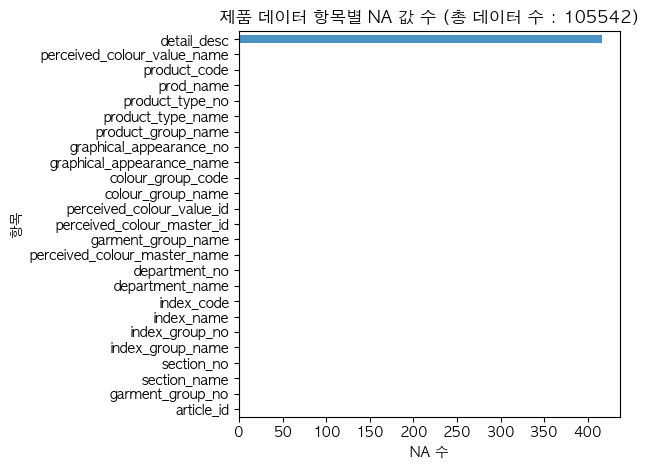

In [11]:
ax = plt.subplot(111)
articles.isna().sum().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_ylabel('항목')
ax.set_xlabel('NA 수')
ax.set_title(f'제품 데이터 항목별 NA 값 수 (총 데이터 수 : {len(articles)})')
plt.tight_layout()

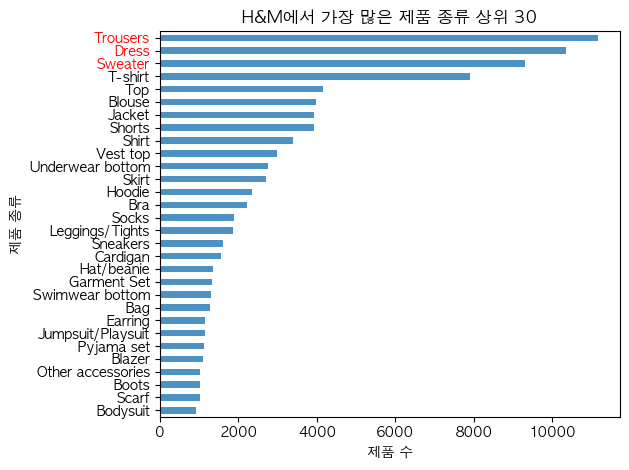

In [12]:
ax = plt.subplot(111)
articles['product_type_name'].value_counts().head(30).sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_ylabel('제품 종류')
ax.set_xlabel('제품 수')

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

ax.set_title('H&M에서 가장 많은 제품 종류 상위 30')
plt.tight_layout()

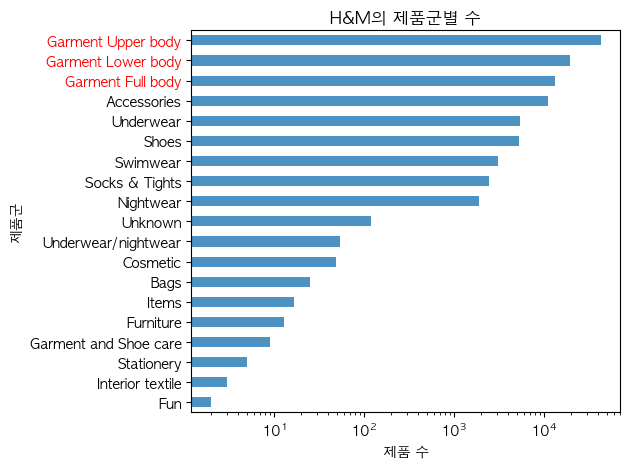

In [13]:
ax = plt.subplot(111)
articles['product_group_name'].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel('제품 수')
ax.set_ylabel('제품군')
ax.set_title('H&M의 제품군별 수')
ax.set_xscale('log')

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

plt.tight_layout()

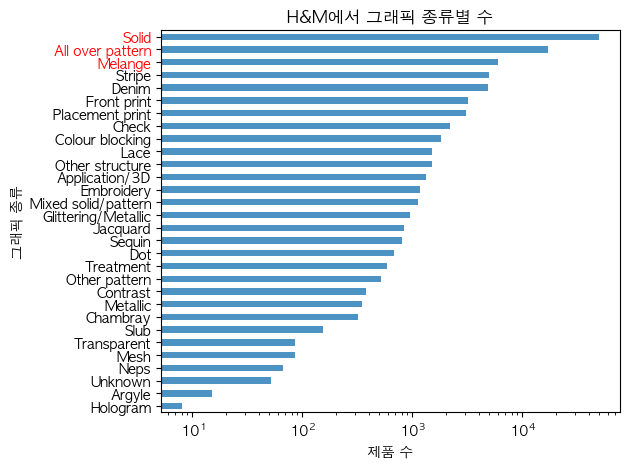

In [14]:
ax = plt.subplot(111)
articles['graphical_appearance_name'].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel('제품 수')
ax.set_ylabel('그래픽 종류')
ax.set_title('H&M에서 그래픽 종류별 수')
ax.set_xscale('log')

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

plt.tight_layout()

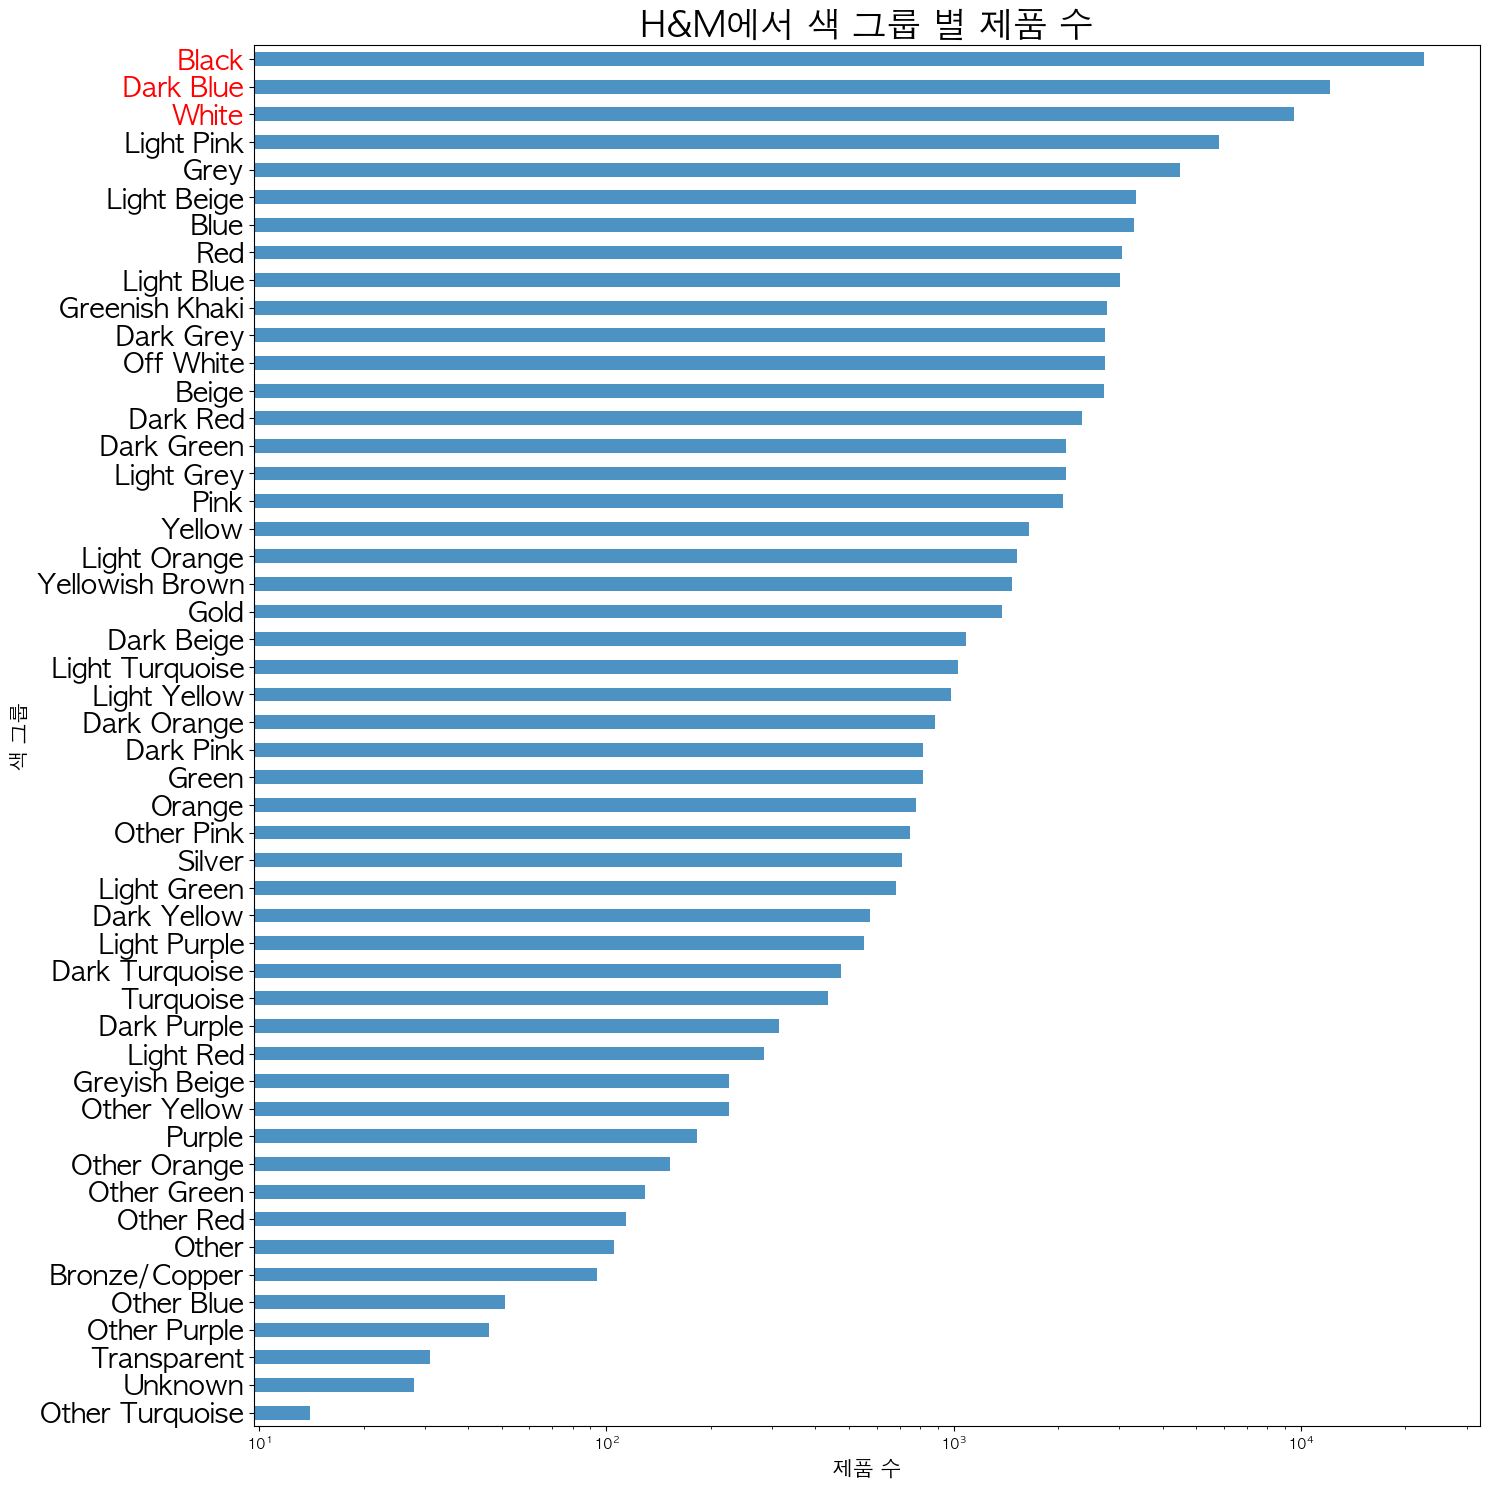

In [15]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(111)
articles["colour_group_name"].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("제품 수", size=15)
ax.set_ylabel("색 그룹", size=15)
ax.set_title("H&M에서 색 그룹 별 제품 수", size=25)
ax.set_xscale("log")
ax.yaxis.set_tick_params(labelsize=20)

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

plt.tight_layout()

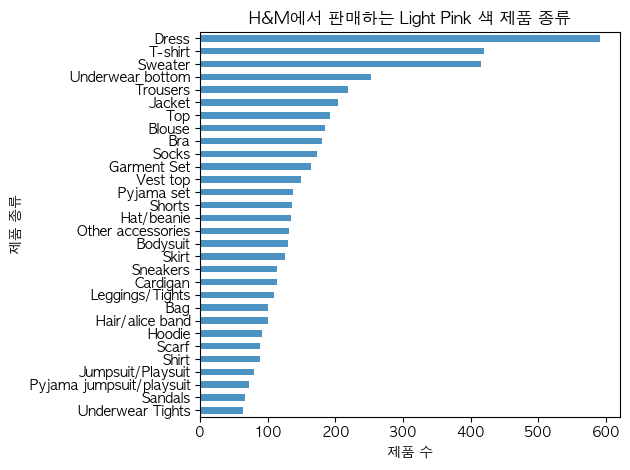

In [57]:
ax = plt.subplot(111)
articles[articles["colour_group_name"].eq('Light Pink')]['product_type_name'].value_counts().head(30).sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel('제품 수')
ax.set_ylabel('제품 종류')
ax.set_title('H&M에서 판매하는 Light Pink 색 제품 종류')
plt.tight_layout()

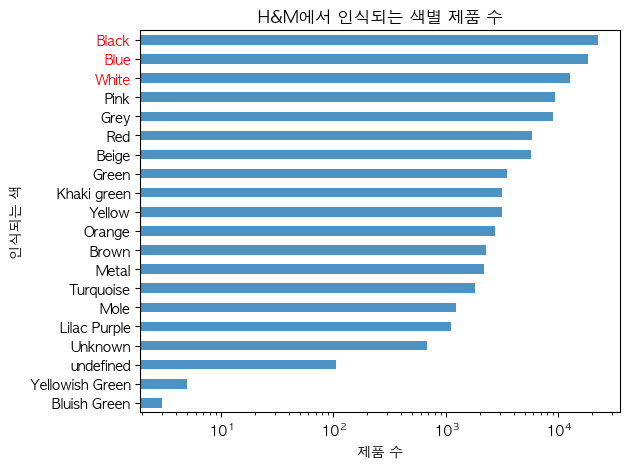

In [16]:
ax = plt.subplot(111)
articles["perceived_colour_master_name"].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("제품 수")
ax.set_ylabel("인식되는 색")
ax.set_title("H&M에서 인식되는 색별 제품 수")
ax.set_xscale("log")

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

plt.tight_layout()

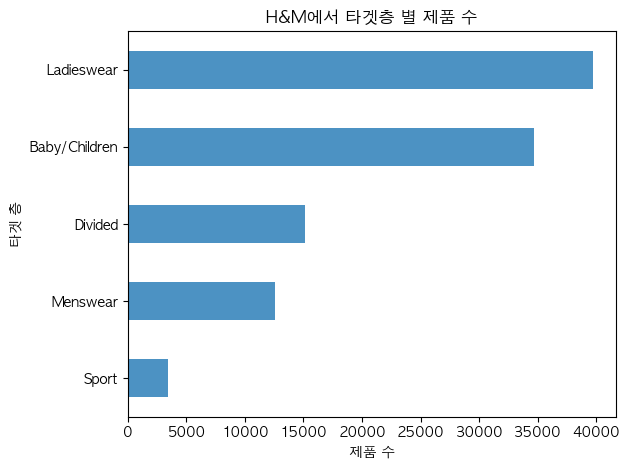

In [17]:
ax = plt.subplot(111)
articles["index_group_name"].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("제품 수")
ax.set_ylabel("타겟 층")
ax.set_title("H&M에서 타겟층 별 제품 수")
plt.tight_layout()

## Customers data

In [18]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


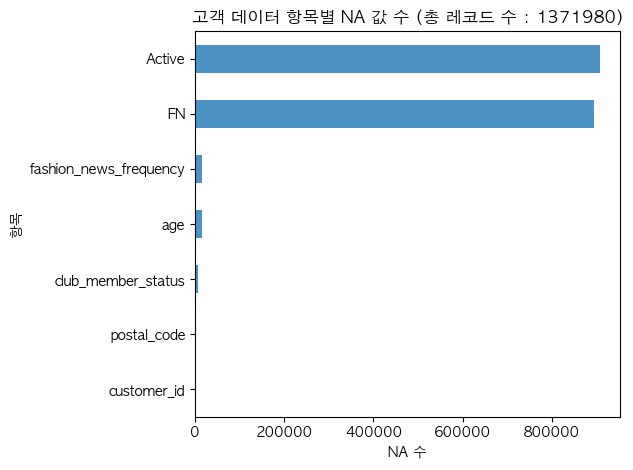

In [19]:
ax = plt.subplot(111)
customers.isna().sum().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_ylabel('항목')
ax.set_xlabel('NA 수')
ax.set_title(f'고객 데이터 항목별 NA 값 수 (총 레코드 수 : {len(customers)})')
plt.tight_layout()

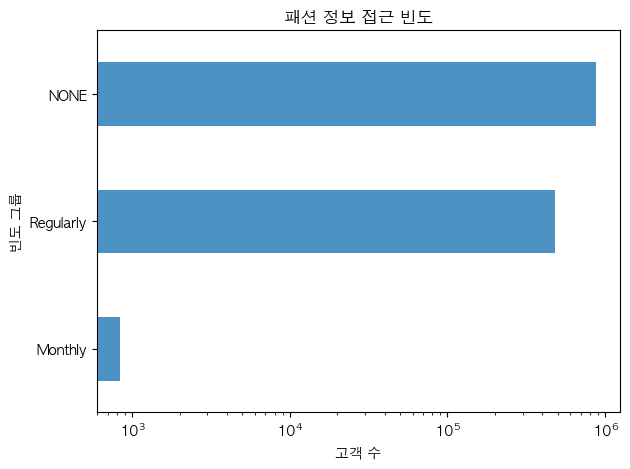

In [20]:
ax = plt.subplot(111)
customers["fashion_news_frequency"].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("고객 수")
ax.set_ylabel("빈도 그룹")
ax.set_title("패션 정보 접근 빈도")
ax.set_xscale("log")
ax.yaxis.set_tick_params()
plt.tight_layout()

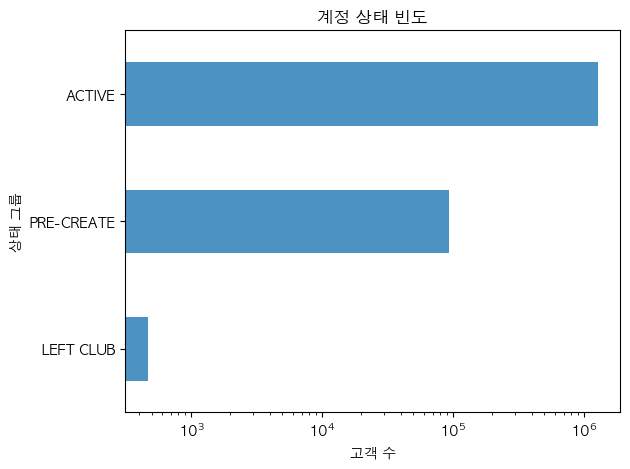

In [21]:
ax = plt.subplot(111)
customers["club_member_status"].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("고객 수")
ax.set_ylabel("상태 그룹")
ax.set_title("계정 상태 빈도")
ax.set_xscale("log")
ax.yaxis.set_tick_params()
plt.tight_layout()

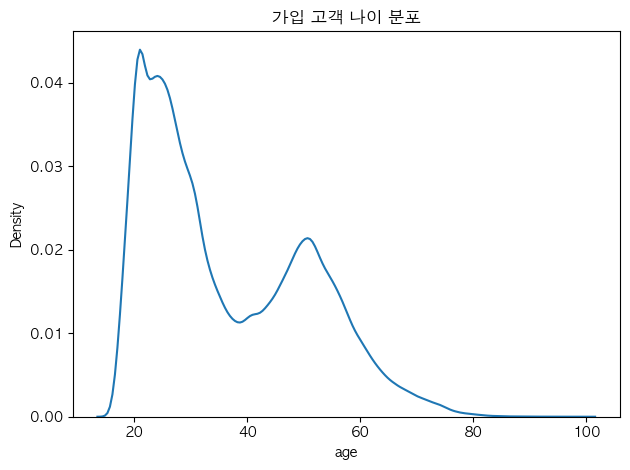

In [22]:
ax = sns.kdeplot(data=customers['age'])
ax.set_title('가입 고객 나이 분포')
plt.tight_layout()

In [23]:
customers['age'].min(), customers['age'].max()

(16.0, 99.0)

### 나이 그룹
- &nbsp; &nbsp; &nbsp; ~ 19
- 20 ~ 24
- 25 ~ 29
- 30 ~ 34
- 35 ~ 39
- 40 ~ 44
- 45 ~ 49
- 50 ~ 54
- 55 ~ 59
- 60 ~

## Transactions data 

In [24]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


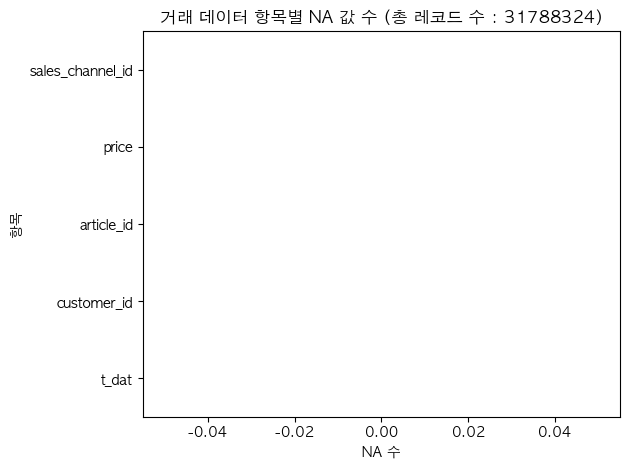

In [25]:
ax = plt.subplot(111)
transactions.isna().sum().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_ylabel('항목')
ax.set_xlabel('NA 수')
ax.set_title(f'거래 데이터 항목별 NA 값 수 (총 레코드 수 : {len(transactions)})')
plt.tight_layout()

In [26]:
transactions['t_dat'].describe()

count                         31788324
mean     2019-09-15 17:27:46.894452992
min                2018-09-20 00:00:00
25%                2019-03-28 00:00:00
50%                2019-08-25 00:00:00
75%                2020-03-29 00:00:00
max                2020-09-22 00:00:00
Name: t_dat, dtype: object

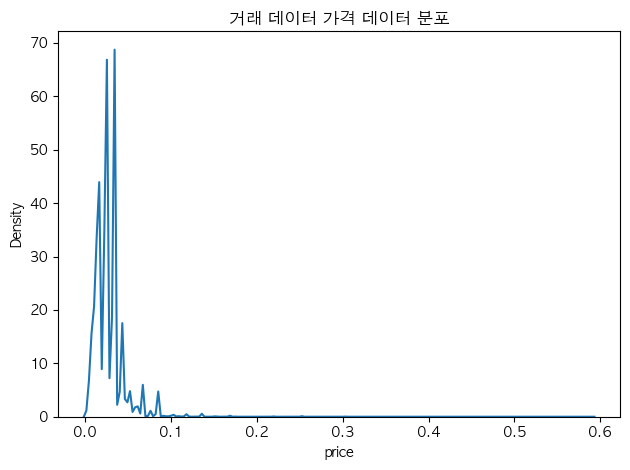

In [27]:
ax = sns.kdeplot(data=transactions['price'])
ax.set_title('거래 데이터 가격 데이터 분포')
plt.tight_layout()

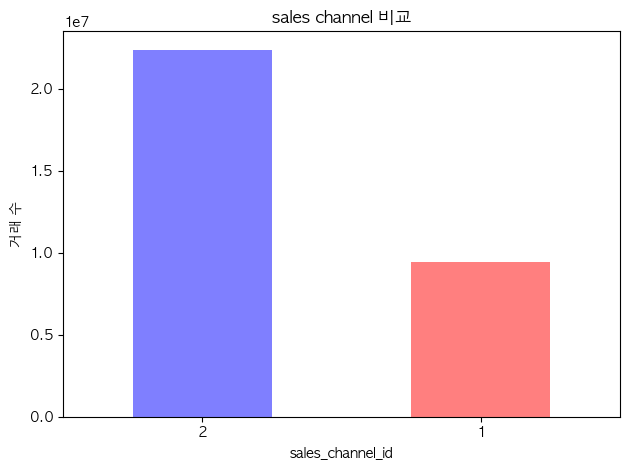

In [28]:
ax = plt.subplot(111)
transactions["sales_channel_id"].value_counts().plot.bar(
    alpha=0.5, ax=ax, rot=0, color=["blue", "red"]
)
plt.tight_layout()
ax.set_ylabel("거래 수")
ax.set_title("sales channel 비교")
plt.tight_layout()

# More deep analysis

## Color X Graphics X Product type

In [29]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

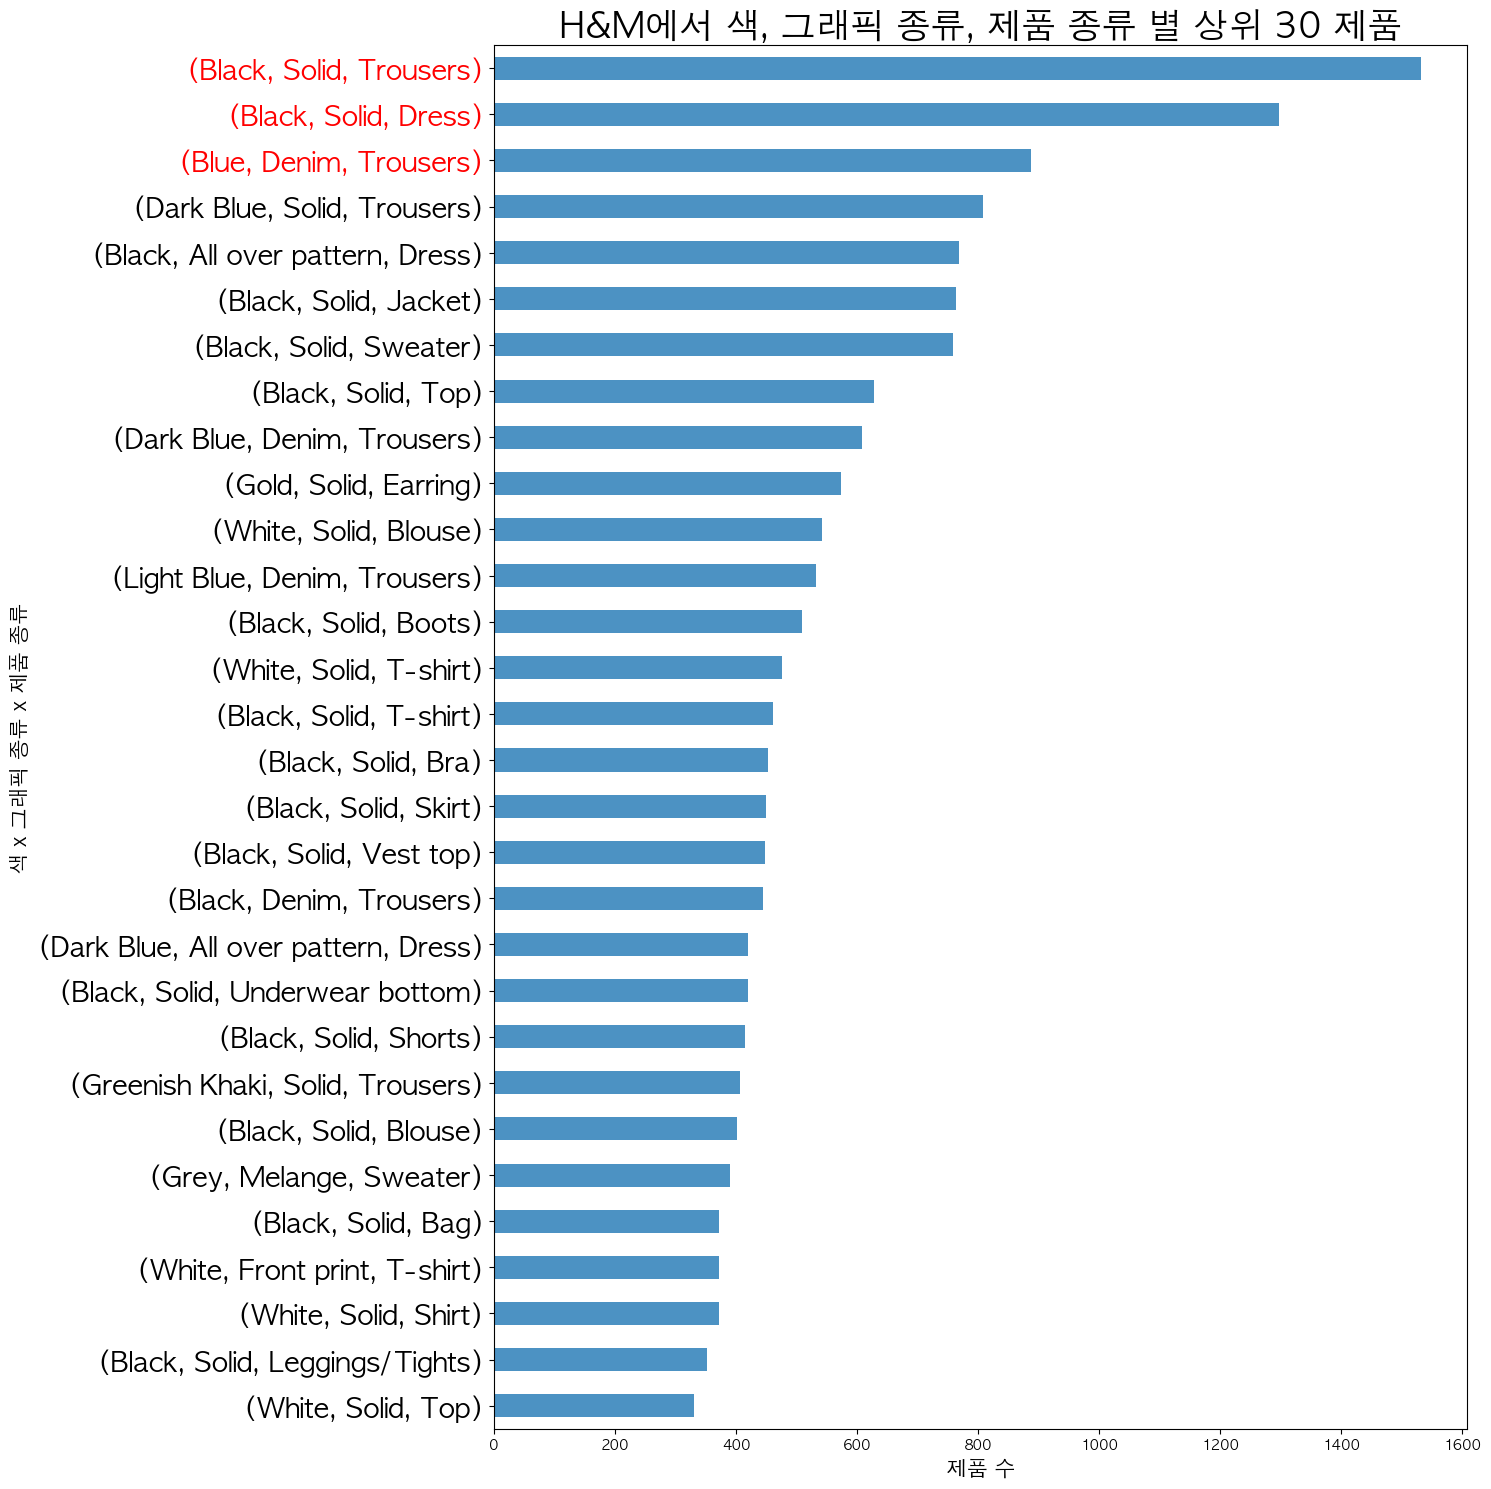

In [30]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(111)
articles[
    ["colour_group_name", "graphical_appearance_name", "product_type_name"]
].value_counts().head(30).sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_xlabel("제품 수", size=15)
ax.set_ylabel("색 x 그래픽 종류 x 제품 종류", size=15)
ax.set_title("H&M에서 색, 그래픽 종류, 제품 종류 별 상위 30 제품", size=25)
ax.yaxis.set_tick_params(labelsize=20)

colors = ["black" for _ in range(len(ax.get_yticklabels()))]
colors[-3:] = ["red", "red", "red"]

for ytick, color in zip(ax.get_yticklabels(), colors):
    ytick.set_color(color)

plt.tight_layout()

## Assign age group

In [31]:
def assign_age_group(age):
    ages = [19, 24, 29, 34, 39, 44, 49, 54, 59]
    groups = [
        "19 이하",
        "20 ~ 24",
        "25 ~ 29",
        "30 ~ 34",
        "35 ~ 39",
        "40 ~ 44",
        "45 ~ 49",
        "50 ~ 54",
        "55 ~ 59",
    ]

    for a, g in zip(ages, groups):
        if age <= a:
            return g
    return '60 이상'

In [32]:
customers["age_group"] = customers["age"].map(assign_age_group)

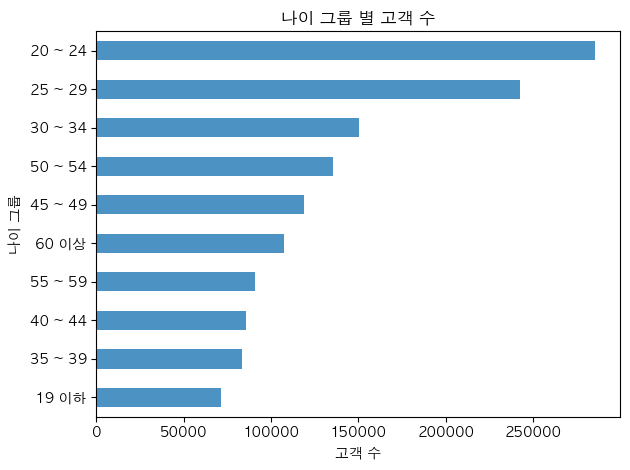

In [33]:
ax = plt.subplot(111)
customers['age_group'].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
plt.tight_layout()
ax.set_ylabel('나이 그룹')
ax.set_xlabel('고객 수')
ax.set_title('나이 그룹 별 고객 수')
plt.tight_layout()

## Age group x Account type

In [34]:
grouped_data = customers[['age_group', 'club_member_status']].value_counts().to_frame().reset_index()

In [35]:
grouped_data.head()

,age_group,club_member_status,count
0,20 ~ 24,ACTIVE,274953
1,25 ~ 29,ACTIVE,229760
2,30 ~ 34,ACTIVE,139654
3,50 ~ 54,ACTIVE,123199
4,45 ~ 49,ACTIVE,108097


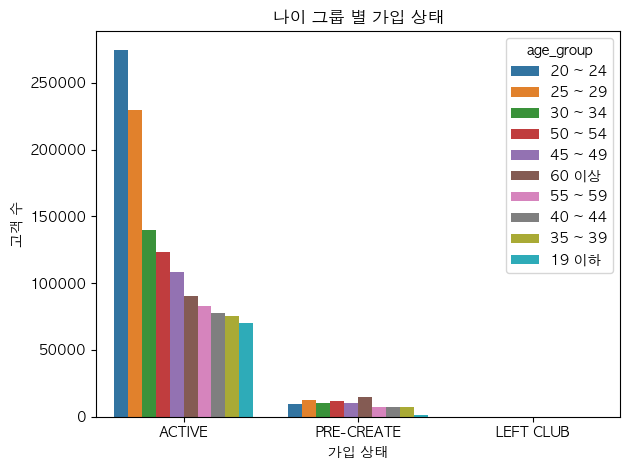

In [36]:
ax = sns.barplot(data=grouped_data, x="club_member_status", y="count", hue="age_group")
ax.set_ylabel('고객 수')
ax.set_xlabel('가입 상태')
ax.set_title('나이 그룹 별 가입 상태')
plt.tight_layout()

## Age group x Fashion news frequency

In [37]:
grouped_data = customers[['age_group', 'fashion_news_frequency']].value_counts().to_frame().reset_index()

In [38]:
grouped_data.head()

,age_group,fashion_news_frequency,count
0,20 ~ 24,NONE,176768
1,25 ~ 29,NONE,166388
2,20 ~ 24,Regularly,106346
3,30 ~ 34,NONE,102526
4,50 ~ 54,NONE,84467


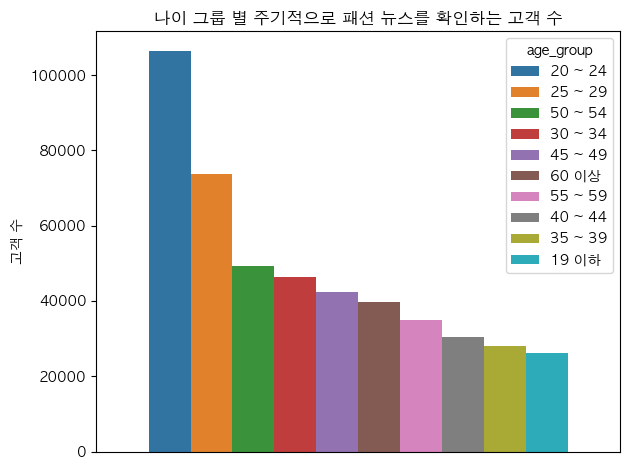

In [39]:
ax = sns.barplot(
    data=grouped_data[grouped_data["fashion_news_frequency"].eq("Regularly")],
    x="fashion_news_frequency",
    y="count",
    hue="age_group",
)
ax.set_ylabel("고객 수")
ax.set_xlabel("")
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_title("나이 그룹 별 주기적으로 패션 뉴스를 확인하는 고객 수")
plt.tight_layout()

50 ~ 54 가 주로 구매하는 항목 확인 (진짜 구매?, 자녀 옷 구매?)

## Join customers data with articles data using transactions data

In [40]:
transaction_info = (
    transactions[["t_dat", "customer_id", "article_id"]]
    .merge(
        customers[
            [
                "customer_id",
                "club_member_status",
                "fashion_news_frequency",
                "age",
                "age_group",
            ]
        ],
        on="customer_id",
    )
    .merge(
        articles[
            [
                "article_id",
                "product_type_name",
                "product_group_name",
                "graphical_appearance_name",
                "colour_group_name",
                "index_group_name",
            ]
        ],
        on="article_id",
    )
)

In [41]:
transaction_info.head()

,t_dat,customer_id,article_id,club_member_status,fashion_news_frequency,age,age_group,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,ACTIVE,NONE,24.0,20 ~ 24,Underwear body,Underwear,Solid,Black,Ladieswear
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,ACTIVE,NONE,24.0,20 ~ 24,Underwear body,Underwear,Solid,Black,Ladieswear
2,2018-11-05,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,ACTIVE,NONE,25.0,25 ~ 29,Underwear body,Underwear,Solid,Black,Ladieswear
3,2018-11-05,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,ACTIVE,NONE,25.0,25 ~ 29,Underwear body,Underwear,Solid,Black,Ladieswear
4,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,ACTIVE,Regularly,30.0,30 ~ 34,Underwear body,Underwear,Solid,Black,Ladieswear


## Top 10 customers who have bought clothes from H&M

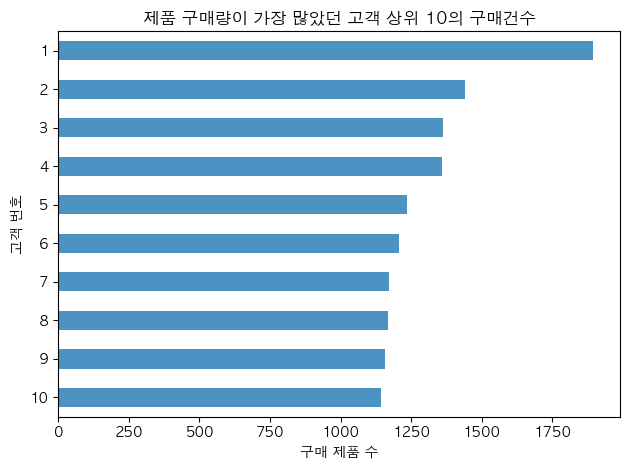

In [42]:
ax = plt.subplot(111)
transaction_info['customer_id'].value_counts().head(10).sort_values().plot.barh(alpha=0.8, ax=ax)
ax.set_ylabel('고객 번호')
ax.set_xlabel('구매 제품 수')
ax.set_yticklabels(range(10, 0, -1))
ax.set_title('제품 구매량이 가장 많았던 고객 상위 10의 구매건수')
plt.tight_layout()

### The number 1 customer analysis

In [43]:
number_one_customer = 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b'

filtered = transaction_info[transaction_info['customer_id'].eq('be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b')]

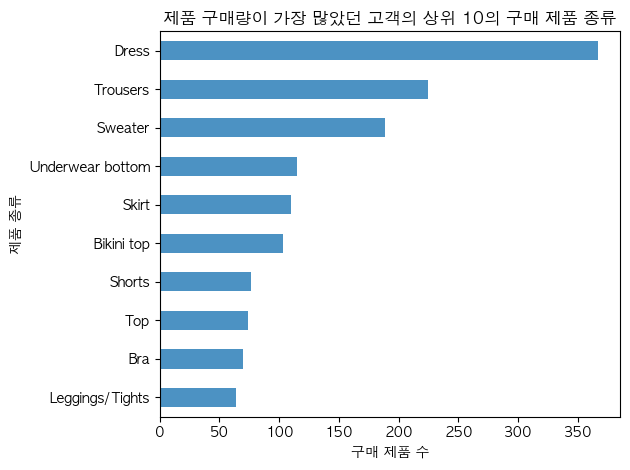

In [44]:
ax = plt.subplot(111)
filtered['product_type_name'].value_counts().head(10).sort_values().plot.barh(alpha=0.8, ax=ax)
ax.set_ylabel('제품 종류')
ax.set_xlabel('구매 제품 수')
ax.set_title('제품 구매량이 가장 많았던 고객의 상위 10의 구매 제품 종류')
plt.tight_layout()

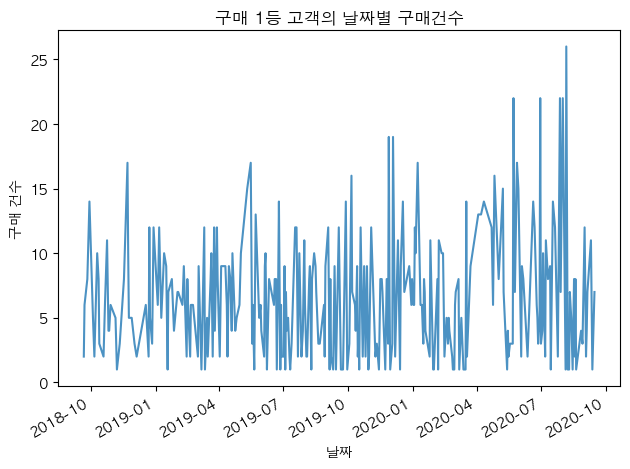

In [45]:
ax = plt.subplot(111)
filtered['t_dat'].value_counts().sort_index().plot.line(ax=ax, alpha=0.8)
ax.set_xlabel('날짜')
ax.set_ylabel('구매 건수')
ax.set_title('구매 1등 고객의 날짜별 구매건수')
plt.tight_layout()

## Total Transaction among dates

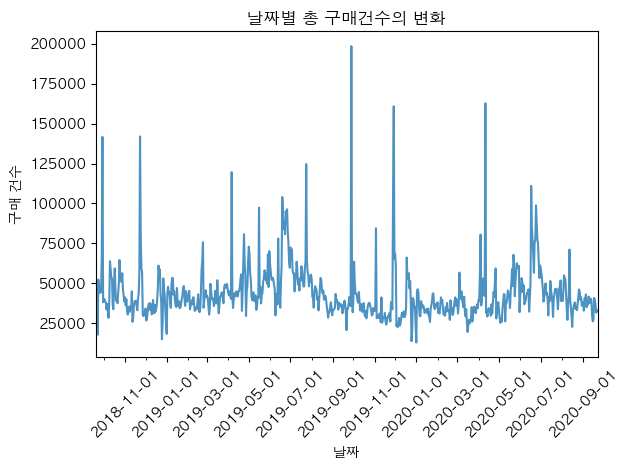

In [46]:
ax = plt.subplot(111)
transaction_info['t_dat'].value_counts().sort_index().plot.line(ax=ax, alpha=0.8)
ax.set_xlabel('날짜')
ax.xaxis.set_major_locator(mdate.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('구매 건수')
ax.set_title('날짜별 총 구매건수의 변화')
plt.xticks(rotation=45)
plt.tight_layout()

## Total Transactions among age groups

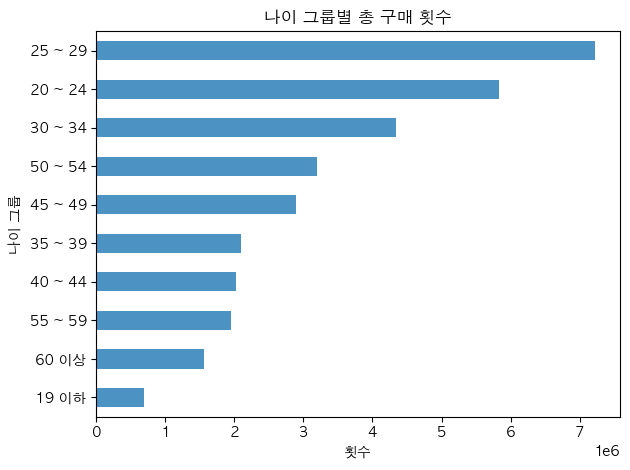

In [47]:
ax = plt.subplot(111)
transaction_info['age_group'].value_counts().sort_values().plot.barh(alpha=0.8, ax=ax)
ax.set_ylabel('나이 그룹')
ax.set_xlabel('횟수')
ax.set_title('나이 그룹별 총 구매 횟수')
plt.tight_layout()

## Top 5 Product type among Age group

In [48]:
grouped = transaction_info[['age_group', 'product_type_name']].value_counts().to_frame().reset_index()
grouped['rank'] = grouped.groupby(by=['age_group'])['count'].rank(ascending=False).astype(int)

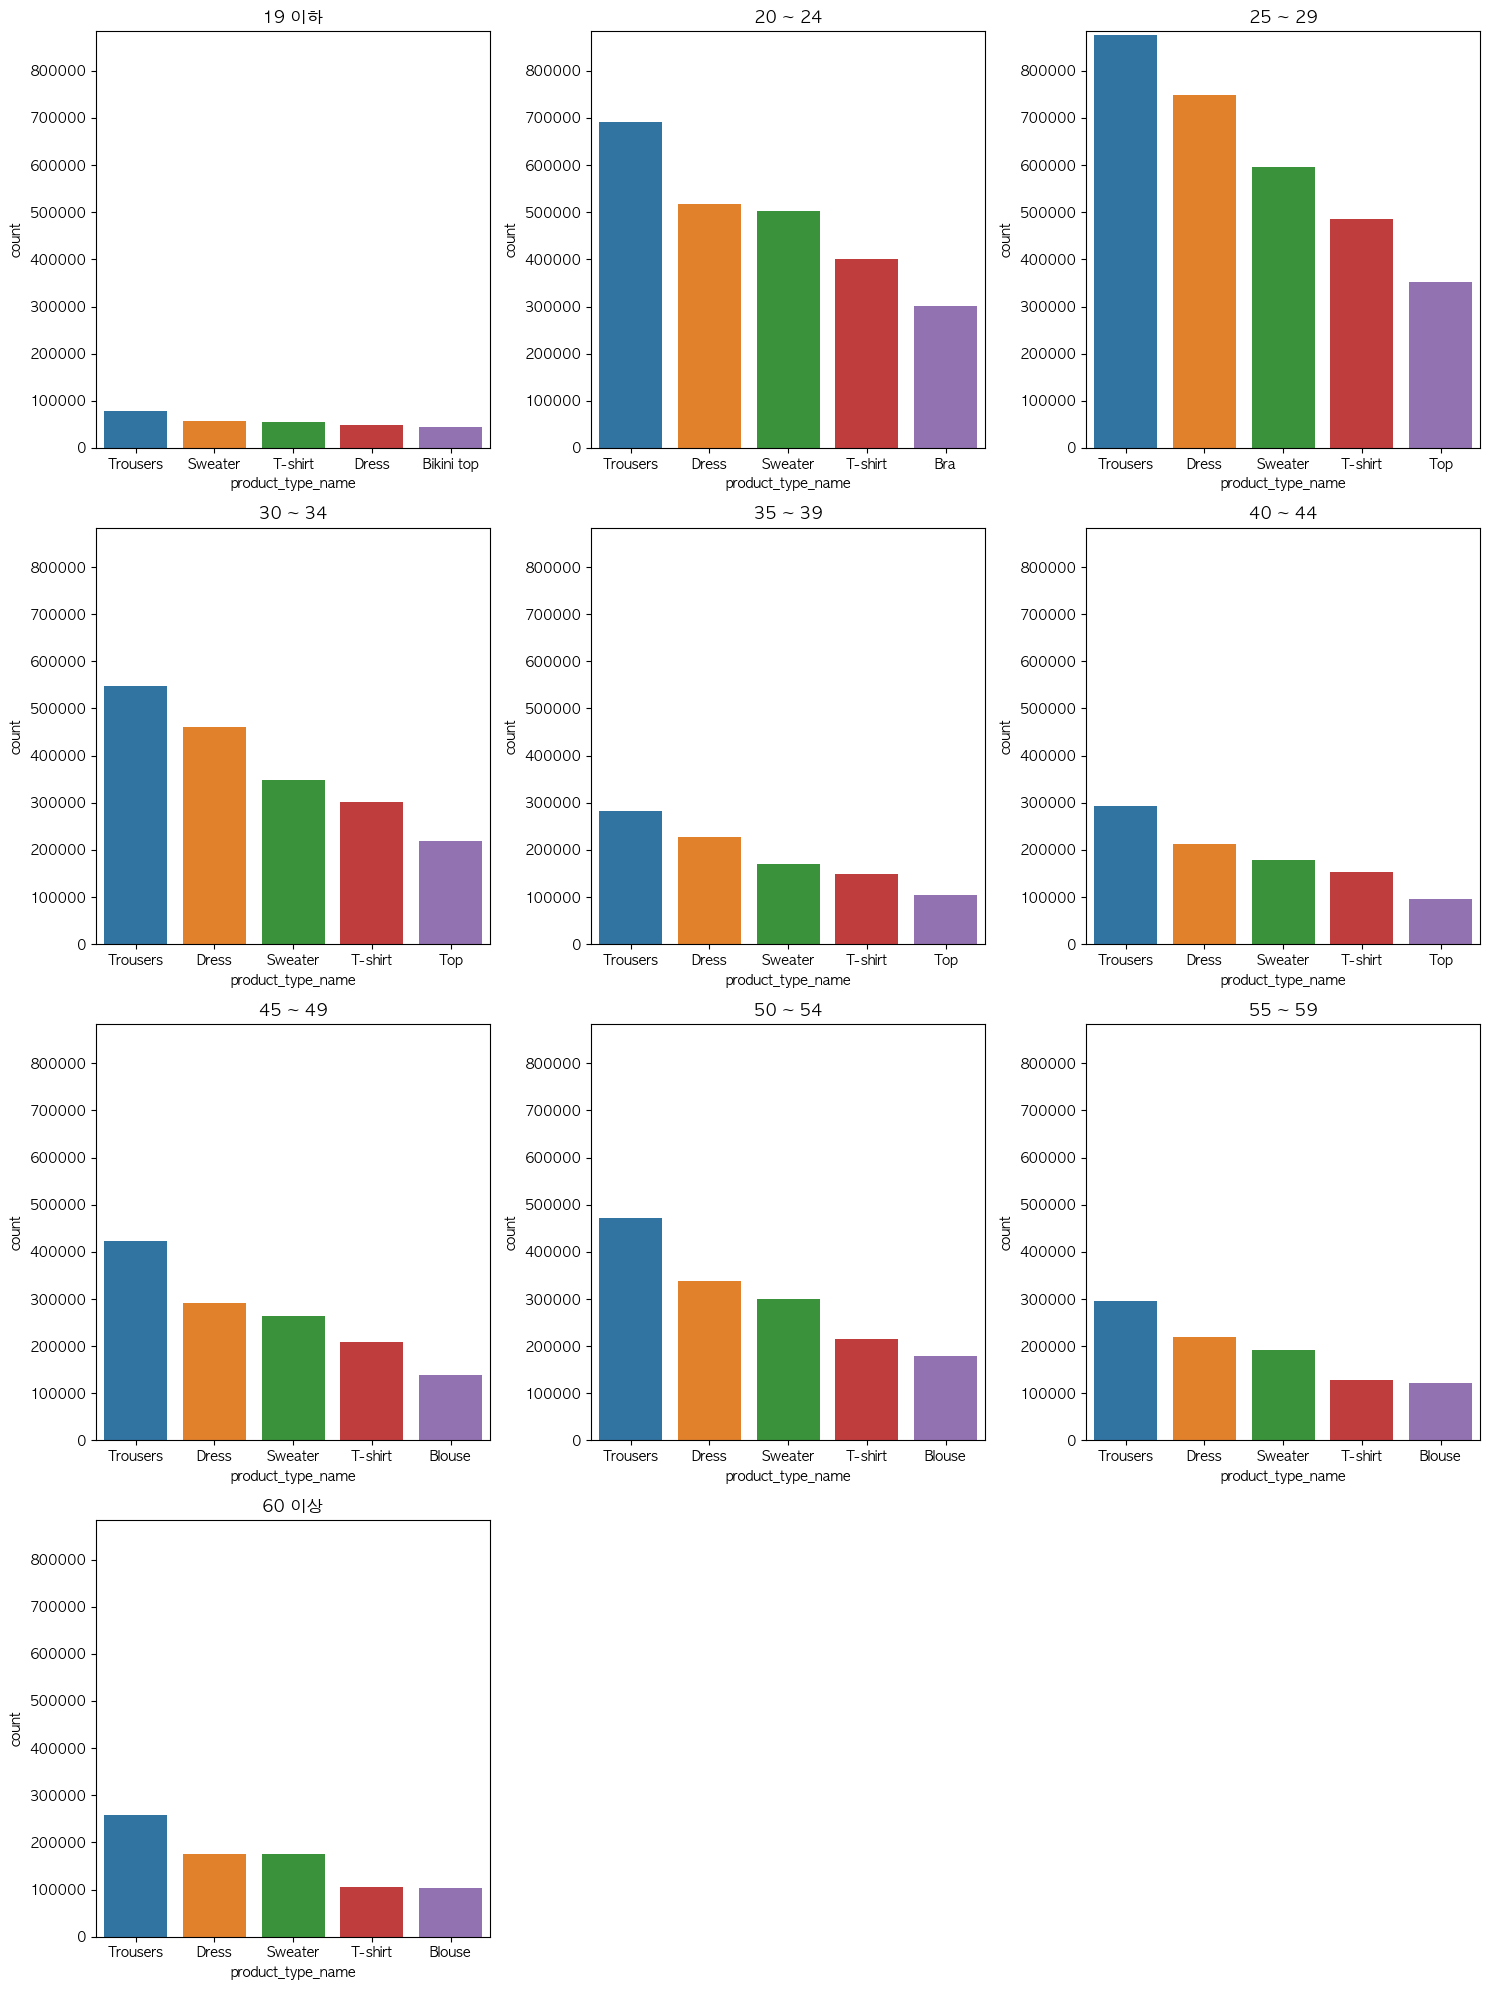

In [49]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes[-1][1].axis("off")
axes[-1][2].axis("off")

filtered = grouped[grouped["rank"].le(5)]

max_val = filtered["count"].max() + filtered["count"].max() * 0.01
for idx, age_group in enumerate(
    [
        "19 이하",
        "20 ~ 24",
        "25 ~ 29",
        "30 ~ 34",
        "35 ~ 39",
        "40 ~ 44",
        "45 ~ 49",
        "50 ~ 54",
        "55 ~ 59",
        "60 이상",
    ]
):
    target_age_group = filtered[filtered["age_group"].eq(age_group)]
    sns.barplot(
        data=target_age_group,
        x="product_type_name",
        y="count",
        ax=axes[idx // 3][idx % 3],
    )
    axes[idx // 3][idx % 3].set_ylim((0, max_val))
    axes[idx // 3][idx % 3].set_title(age_group)
plt.tight_layout()

## Top 5 colors among age groups

In [50]:
grouped = transaction_info[['age_group', 'colour_group_name']].value_counts().to_frame().reset_index()
grouped['rank'] = grouped.groupby(by=['age_group'])['count'].rank(ascending=False).astype(int)

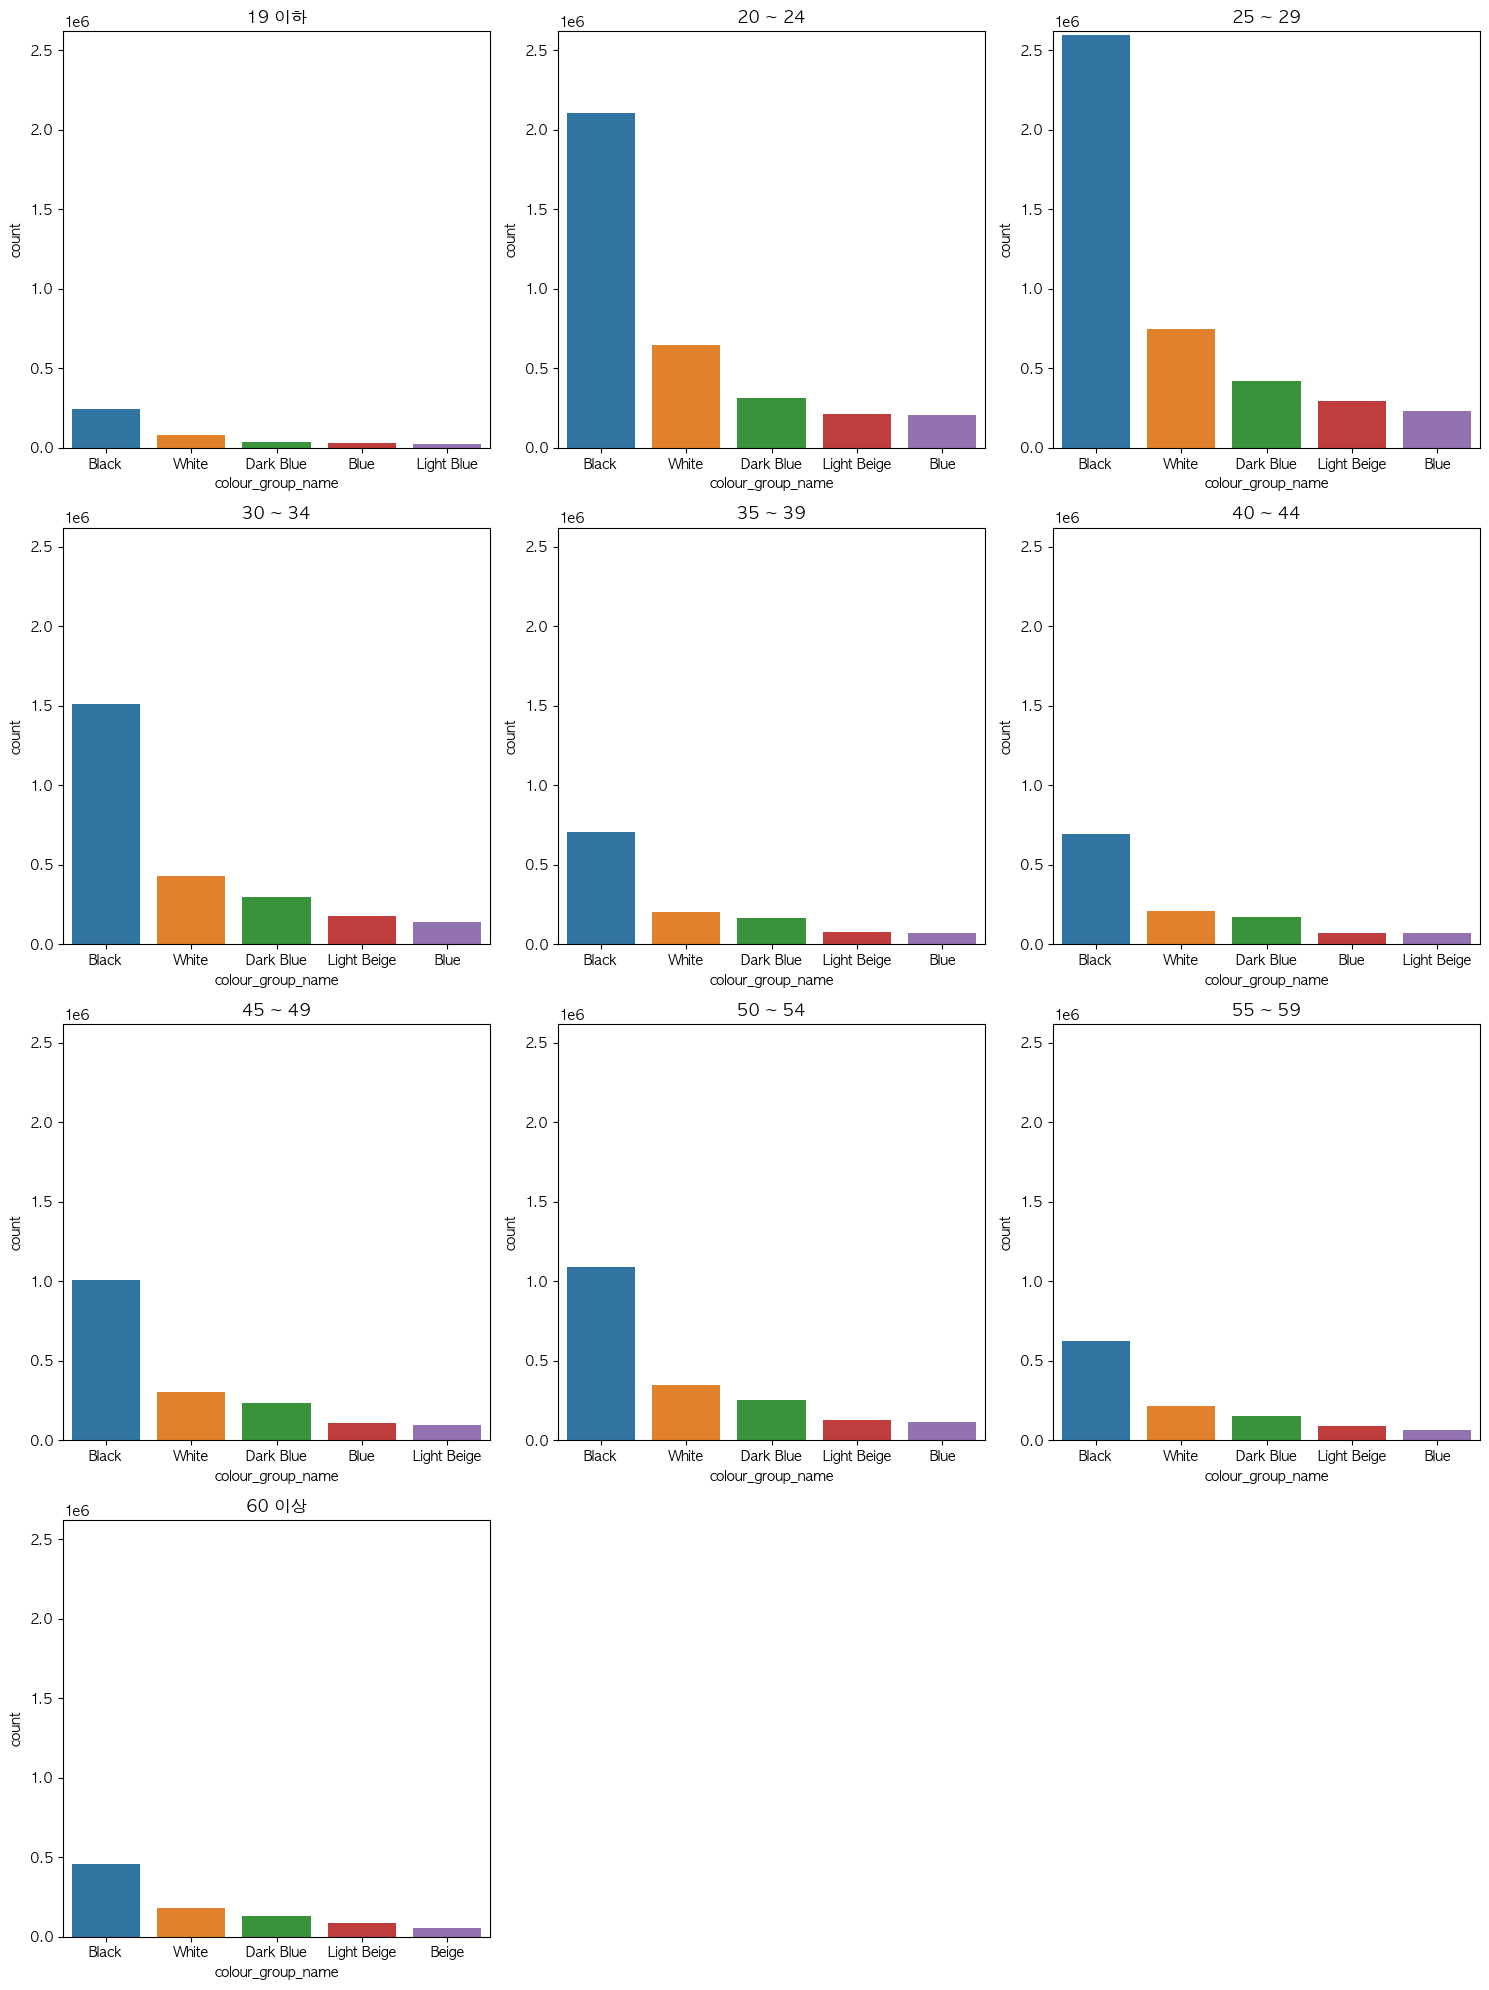

In [51]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes[-1][1].axis("off")
axes[-1][2].axis("off")

filtered = grouped[grouped["rank"].le(5)]

max_val = filtered["count"].max() + filtered["count"].max() * 0.01
for idx, age_group in enumerate(
    [
        "19 이하",
        "20 ~ 24",
        "25 ~ 29",
        "30 ~ 34",
        "35 ~ 39",
        "40 ~ 44",
        "45 ~ 49",
        "50 ~ 54",
        "55 ~ 59",
        "60 이상",
    ]
):
    target_age_group = filtered[filtered["age_group"].eq(age_group)]
    sns.barplot(
        data=target_age_group,
        x="colour_group_name",
        y="count",
        ax=axes[idx // 3][idx % 3],
    )
    axes[idx // 3][idx % 3].set_ylim((0, max_val))
    axes[idx // 3][idx % 3].set_title(age_group)
plt.tight_layout()

## Item bought among age groups venn diagram

In [52]:
sets = []
labels = []

for age_group in [
    "19 이하",
    "20 ~ 24",
    "25 ~ 29",
    "30 ~ 34",
    "35 ~ 39",
    "40 ~ 44",
    "45 ~ 49",
    "50 ~ 54",
    "55 ~ 59",
    "60 이상",
]:
    sets.append(set(transaction_info[transaction_info['age_group'].eq(age_group)]['article_id']))
    labels.append(age_group)

Text(0.5, 1.0, '나이 그룹별 구매 공동 구매 물품 벤 다이어그램 시각화')

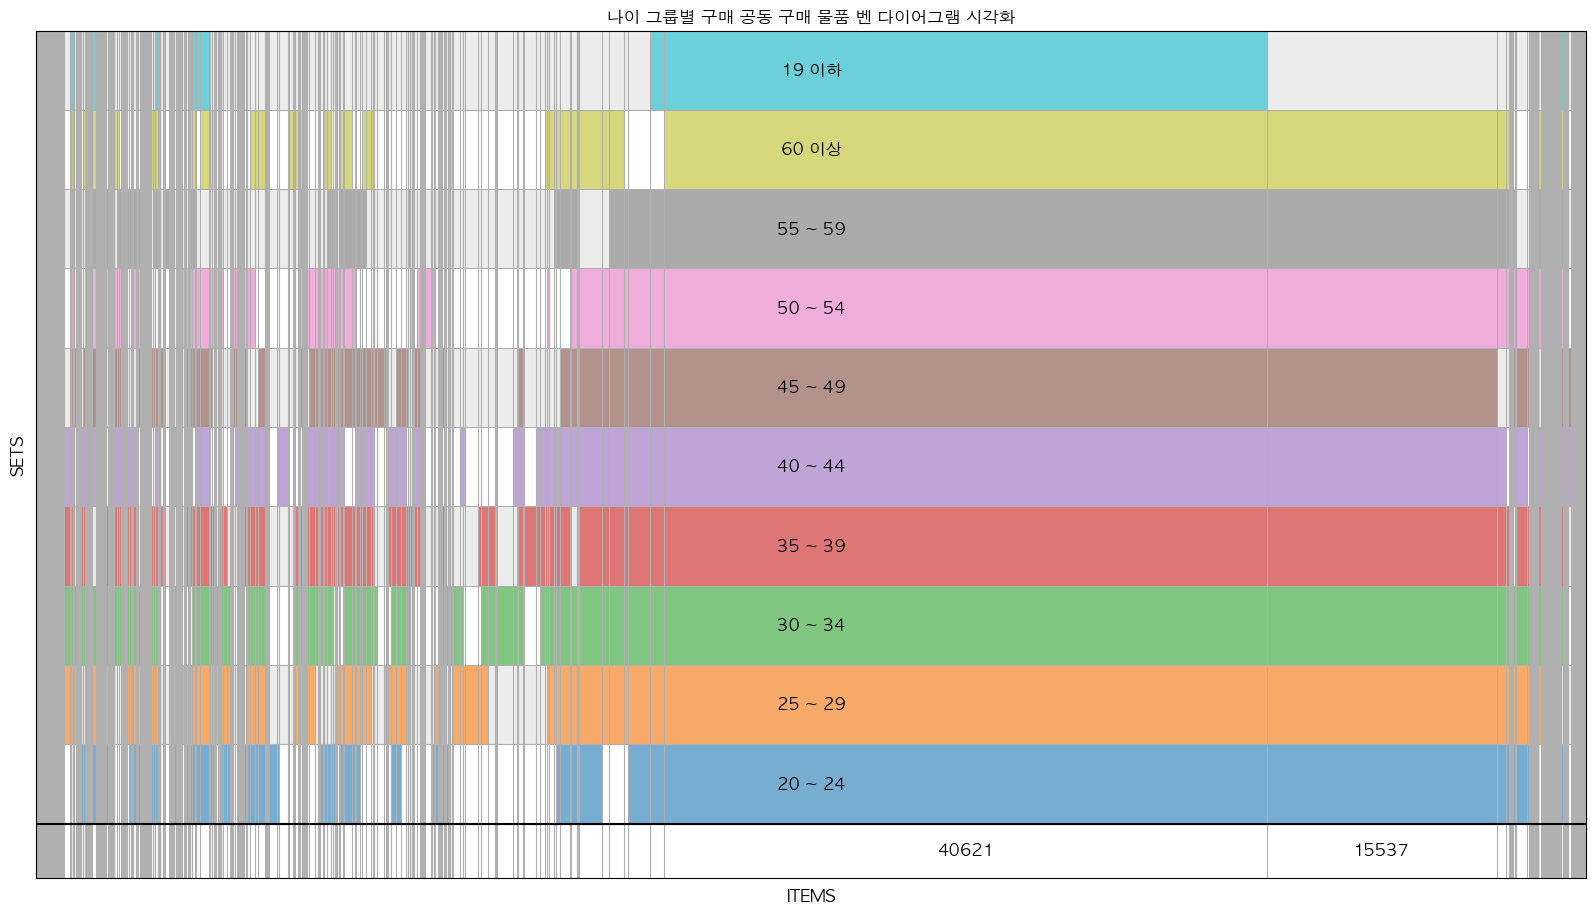

In [53]:
plt.figure(figsize=(20, 11))
supervenn(
    sets,
    labels,
    side_plots=False,
    sets_ordering="minimize gaps",
    min_width_for_annotation=10000,
)
plt.title('나이 그룹별 구매 공동 구매 물품 벤 다이어그램 시각화')